## **Reto: Entrega 2** - Casificación, Ensambles
### **TC4029 - Ciencia y Analítica de Datos**

**Prof. María de la Paz Rico Fernández**

**Prof. Julio César Galindo López**

### **Equipo 124**
**Alejandra Guadalupe Larranaga Altamirano | A01794334**

**Iván Lee Cancino | A01793491**

*18 - Noviembre - 2022*

---


---

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Clasificación

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn import preprocessing

Importamos la base de datos limpia de la entrega anterior.

In [3]:
path = '/content/drive/MyDrive/TC4029Data_Science/Proyecto_final/calidad_aguas_superf_clean.csv'

In [4]:
df = pd.read_csv(path, index_col=0)
df.head()

,LONGITUD,LATITUD,DBO_mg/L,DQO_mg/L,SST_mg/L,COLI_FEC_NMP_100mL,E_COLI_NMP_100mL,OD_PORC,TOX_D_48_UT,TOX_V_15_UT,TOX_FIS_SUP_15_UT,SEMAFORO,GRUPO,Coordenadas
0,-102.33911,22.24730,6.00,54.08,13.7500,1162.0,98.0,68.3,1.0,1.0,1.0,Rojo,LENTICO,POINT (-102.33911 22.2473)
1,-109.84290,22.90473,2.63,27.01,10.0000,2400.0,424.0,68.3,1.0,1.0,1.0,Verde,COSTERO,POINT (-109.8429 22.90473)
2,-109.86442,22.89880,2.63,27.01,10.0000,2400.0,424.0,68.3,1.0,1.0,1.0,Verde,COSTERO,POINT (-109.86442 22.8988)
3,-109.88604,22.89609,2.63,27.01,13.9667,2400.0,424.0,68.3,1.0,1.0,1.0,Verde,COSTERO,POINT (-109.88604 22.89609)
4,-109.89657,22.87694,2.63,27.01,10.0000,2400.0,424.0,68.3,1.0,1.0,1.0,Verde,COSTERO,POINT (-109.89657 22.87694)


###Selecciona tus variables independientes X y dependiente Y (semáforo)

In [5]:
df_clas = df.copy()
df_clas.drop(['GRUPO', 'Coordenadas'], axis=1, inplace=True)

df_clas.head()

,LONGITUD,LATITUD,DBO_mg/L,DQO_mg/L,SST_mg/L,COLI_FEC_NMP_100mL,E_COLI_NMP_100mL,OD_PORC,TOX_D_48_UT,TOX_V_15_UT,TOX_FIS_SUP_15_UT,SEMAFORO
0,-102.33911,22.24730,6.00,54.08,13.7500,1162.0,98.0,68.3,1.0,1.0,1.0,Rojo
1,-109.84290,22.90473,2.63,27.01,10.0000,2400.0,424.0,68.3,1.0,1.0,1.0,Verde
2,-109.86442,22.89880,2.63,27.01,10.0000,2400.0,424.0,68.3,1.0,1.0,1.0,Verde
3,-109.88604,22.89609,2.63,27.01,13.9667,2400.0,424.0,68.3,1.0,1.0,1.0,Verde
4,-109.89657,22.87694,2.63,27.01,10.0000,2400.0,424.0,68.3,1.0,1.0,1.0,Verde


In [6]:
# Dividimos X , y
X = df_clas.drop(['SEMAFORO'], axis=1)
y = df_clas[['SEMAFORO']]

y.value_counts()

SEMAFORO
Verde       1267
Amarillo    1135
Rojo        1091
dtype: int64

###Cambia a label encoding el semáforo

In [7]:
le = preprocessing.LabelEncoder()
le.fit(y['SEMAFORO'])

# Verificamos la codificación de cada color
le.transform(['Amarillo', 'Rojo', 'Verde'])

array([0, 1, 2])

In [8]:
# Transformamos la columna
y['SEMAFORO'] = le.transform(y['SEMAFORO'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


###Realiza un análisis general de las features importances a traves de decision trees o random forest.

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split 

Del clasificador **Random Forest**, podemos utilizar la variable **feature_importances_** que nos da el score de la importancia relativa de cada atributo.

In [10]:
RF_clf = RandomForestClassifier(n_estimators=500, random_state=42)
RF_clf.fit(X, y)

for score, name in zip (RF_clf.feature_importances_, X.columns):
  print(name, round(score, 2)) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


LONGITUD 0.08
LATITUD 0.07
DBO_mg/L 0.1
DQO_mg/L 0.33
SST_mg/L 0.06
COLI_FEC_NMP_100mL 0.19
E_COLI_NMP_100mL 0.12
OD_PORC 0.04
TOX_D_48_UT 0.0
TOX_V_15_UT 0.0
TOX_FIS_SUP_15_UT 0.0


Observamos que las variables con mayor importancia para el clasificador son:

* 33% - DQO_mg/L 
* 19% - COLI_FEC_NMP_100mL
* 12% - E_COLI_NMP_100mL 
* 10% - DBO_mg/L 

**De lo anterior podemos interpretar que nuestro modelo tomará las concentraciones de esos contaminantes en el agua para clasificarlas en una de las categoríaas del semáforo: verde, amarillo o rojo.**

###Selecciona las variables de mayor importancia.

Seleccionamos las siguientes variables:

* **DQO_mg/L**: Demanda Quimica de Oxígeno, en miligramos por litro.
* **COLI_FEC_NMP_100mL**: Coliformes Fecales, en numero mas probable por cien mililitros. 
* **E_COLI_NMP_100mL**: Escherichia coli, en numero mas probable por cien mililitros.
* **DBO_mg/L**: Demanda Bioquímica de Oxígeno, en miligramos por litro.

In [11]:
Xn = X.copy()
Xn.drop(['LONGITUD', 'LATITUD','SST_mg/L','OD_PORC',
         'TOX_D_48_UT','TOX_V_15_UT', 'TOX_FIS_SUP_15_UT'],
         axis=1, inplace=True 
        )
Xn

,DBO_mg/L,DQO_mg/L,COLI_FEC_NMP_100mL,E_COLI_NMP_100mL
0,6.00,54.08,1162.0,98.0
1,2.63,27.01,2400.0,424.0
2,2.63,27.01,2400.0,424.0
3,2.63,27.01,2400.0,424.0
4,2.63,27.01,2400.0,424.0
...,...,...,...,...
3488,2.00,10.00,2400.0,2400.0
3489,39.09,115.88,2400.0,4.0
3490,4.40,87.64,240.0,15.0
3491,2.00,35.92,2400.0,11.0


###Realiza tu clasificador, recuerda dividir los datos de manera balanceada (auxiliate de train test split)

In [12]:
from sklearn.preprocessing import label_binarize

Para poder crear la gráfica Precision-Recall con mas de dos clases como en el caso de nuestro semáforo, es necesario binarizar las clases utilizando **label_binarize**. Posteriormente dividimos los datos de entrenamiento y prueba.

In [13]:
Y = label_binarize(y, classes=[0,1,2])

# Dividimos los datos de entrenamiento y prueba 75/25
X_train, X_test, y_train, y_test = train_test_split(Xn, Y, test_size = 0.25, random_state = 42)

###Explora que clasificador es el más optimo

In [14]:
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.multiclass import OneVsRestClassifier
from sklearn.tree import export_graphviz
from graphviz import Source 

**Decision Tree**

Exploramos con diferentes valores de parámetros en nuestro Decision tree

Aseguramos el balanceo entre clases con el parámetro **class_weight**

In [15]:
DT_clf1 = DecisionTreeClassifier(max_depth=4, min_samples_leaf= 6, random_state=42, class_weight='balanced')
DT_clf2 = DecisionTreeClassifier(max_depth=5, min_samples_leaf= 5, random_state=42, class_weight='balanced')
DT_clf3 = DecisionTreeClassifier(max_depth=5, min_samples_leaf= 4, random_state=42, class_weight='balanced')
DT_clf4 = DecisionTreeClassifier(max_depth=5, min_samples_leaf= 3, random_state=42, class_weight='balanced')

DT_clf1.fit(X_train, y_train)
DT_clf2.fit(X_train, y_train) 
DT_clf3.fit(X_train, y_train)
DT_clf4.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=5, min_samples_leaf=3,
                       random_state=42)

Vemos la precisión alcanzada por cada modelo con nuestros datos de prueba:

In [16]:
print('Accuracy de Decision Tree 1:', round(DT_clf1.score(X_train, y_train)*100, 2))
print('Accuracy de Decision Tree 2:', round(DT_clf2.score(X_train, y_train)*100, 2))
print('Accuracy de Decision Tree 3:', round(DT_clf3.score(X_train, y_train)*100, 2))
print('Accuracy de Decision Tree 4:', round(DT_clf4.score(X_train, y_train)*100, 2))

Accuracy de Decision Tree 1: 85.72
Accuracy de Decision Tree 2: 91.52
Accuracy de Decision Tree 3: 91.52
Accuracy de Decision Tree 4: 91.52


**Random Forest**

Exploramos con diferentes valores del parámetro **n_estimators** en nuestro clasificador Random forest

Aseguramos el balanceo entre clases con el parámetro **class_weight**

In [17]:
RF_clf1 = RandomForestClassifier(random_state=42, n_estimators=100, min_samples_leaf=3, class_weight='balanced') 
RF_clf2 = RandomForestClassifier(random_state=42, n_estimators=300, min_samples_leaf=3, class_weight='balanced')
RF_clf3 = RandomForestClassifier(random_state=42, n_estimators=500, min_samples_leaf=3, class_weight='balanced')
RF_clf4 = RandomForestClassifier(random_state=42, n_estimators=600, min_samples_leaf=3, class_weight='balanced')

RF_clf1.fit(X_train, y_train)
RF_clf2.fit(X_train, y_train) 
RF_clf3.fit(X_train, y_train)
RF_clf4.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', min_samples_leaf=3,
                       n_estimators=600, random_state=42)

In [18]:
print('Accuracy de Random Forest 1:', round(RF_clf1.score(X_train, y_train)*100, 2))
print('Accuracy de Random Forest 2:', round(RF_clf2.score(X_train, y_train)*100, 2))
print('Accuracy de Random Forest 3:', round(RF_clf3.score(X_train, y_train)*100, 2))
print('Accuracy de Random Forest 4:', round(RF_clf4.score(X_train, y_train)*100, 2))

Accuracy de Random Forest 1: 92.52
Accuracy de Random Forest 2: 92.52
Accuracy de Random Forest 3: 92.48
Accuracy de Random Forest 4: 92.48


Observamos que con los datos de entrenamiento, el clasificador *Random Forest* nos da una exactitud un poco mejor que *Decision Tree*.

###Determina el grado de exactitud a través del reporte de clasificación y análisis de la gráfica de Precision Recall.

Los scores iniciales fueron obtenidos con los datos de entrenamiento para explorar los hyperparametros de cada modelo. 

Ahora obtenemos la gráfica Precision-Recall y el reporte de las principales métricas de clasificación usando **classification_report** para nuestros datos de prueba con los clasificadores seleccionados. 

Utilizamos **OneVsRestClassifier** de Scikit-learn para evaluar cada una de las tres clases y obtener los datos de Precision y Recall para poder graficar.

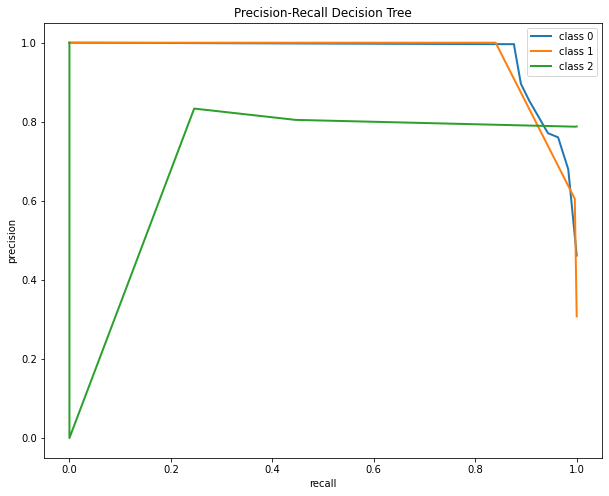

Accuracy de Decision Tree: 90.5
___Reporte Decision Tree (set de prueba)___
              precision    recall  f1-score   support

           0       0.99      0.87      0.93       300
           1       1.00      0.83      0.91       269
           2       0.79      1.00      0.88       305

   micro avg       0.91      0.91      0.91       874
   macro avg       0.93      0.90      0.91       874
weighted avg       0.92      0.91      0.91       874
 samples avg       0.91      0.91      0.91       874



In [19]:
DTovr = OneVsRestClassifier(DT_clf3)
DTovr.fit(X_train, y_train)
y_pred_probDT = DTovr.predict_proba(X_test)


precision = dict()
recall = dict()

plt.figure(figsize=(10,8))
for i in range(3):
    precision[i], recall[i], _ = precision_recall_curve(y_test[:, i],
                                                        y_pred_probDT[:, i]
                                                        )
    plt.plot(recall[i], precision[i], lw=2, label='class {}'.format(i))
    
plt.xlabel('recall')
plt.ylabel('precision')
plt.legend(loc='best')
plt.title('Precision-Recall Decision Tree')
plt.show()


y_testDT = DT_clf3.predict(X_test) 

print('Accuracy de Decision Tree:', round(DT_clf3.score(X_test, y_test)*100, 2))
print('___Reporte Decision Tree (set de prueba)___')
print(classification_report(y_test, y_testDT, target_names=['0','1','2']), ) 

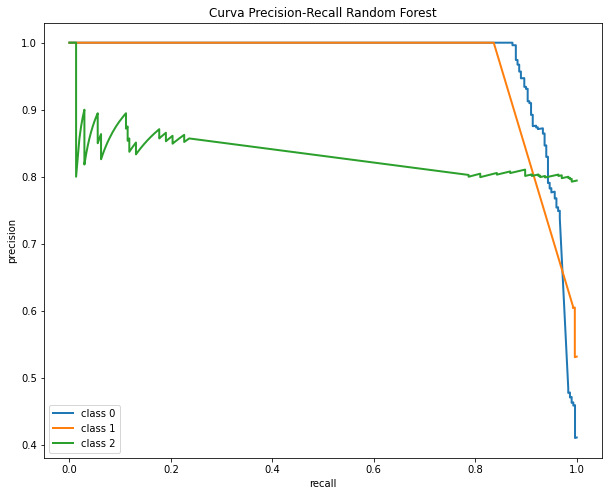

Accuracy de Random Forest: 90.62
___Reporte Random Forest (set de prueba)___
              precision    recall  f1-score   support

           0       0.99      0.88      0.93       300
           1       1.00      0.83      0.91       269
           2       0.80      0.99      0.89       305

   micro avg       0.91      0.91      0.91       874
   macro avg       0.93      0.90      0.91       874
weighted avg       0.93      0.91      0.91       874
 samples avg       0.91      0.91      0.91       874



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [20]:
RFovr = OneVsRestClassifier(RF_clf2)
RFovr.fit(X_train, y_train)
y_pred_probRF = RFovr.predict_proba(X_test)

precision = dict()
recall = dict()

plt.figure(figsize=(10,8))
for i in range(3):
    precision[i], recall[i], _ = precision_recall_curve(y_test[:, i],
                                                        y_pred_probRF[:, i]
                                                        )
    plt.plot(recall[i], precision[i], lw=2, label='class {}'.format(i))
    
plt.xlabel('recall')
plt.ylabel('precision')
plt.legend(loc='lower left')
plt.title('Curva Precision-Recall Random Forest')
plt.show()

y_testRF = RF_clf2.predict(X_test) 

print('Accuracy de Random Forest:', round(RF_clf2.score(X_test, y_test)*100, 2))
print('___Reporte Random Forest (set de prueba)___')
print(classification_report(y_test, y_testRF, target_names=['0','1','2']))   

Con nuestros datos de prueba, ambos modelos nos dan una precisión muy similar. De las curvas Precision-Recall observamos que para la clase 2, que representa el color Verde del semáforo, resultan menos precisos nuestros clasificadores. 

###Visualiza los resultados del modelo o las predicciones a través de una matriz de confusión.

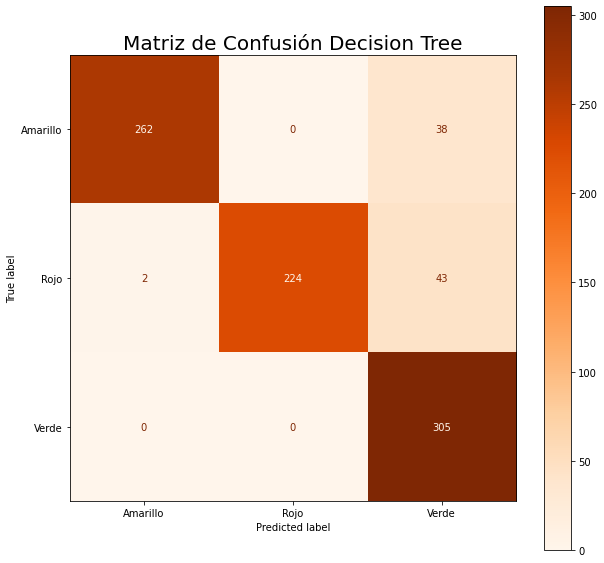

In [31]:
fig, axs = plt.subplots(figsize=(10,10))
ConfusionMatrixDisplay.from_predictions(y_test.argmax(axis=1), y_testDT.argmax(axis=1),
                                        display_labels=['Amarillo','Rojo','Verde'],
                                        cmap='Oranges', ax=axs
                                        )

axs.set_title('Matriz de Confusión Decision Tree', fontsize=20)
plt.show() 

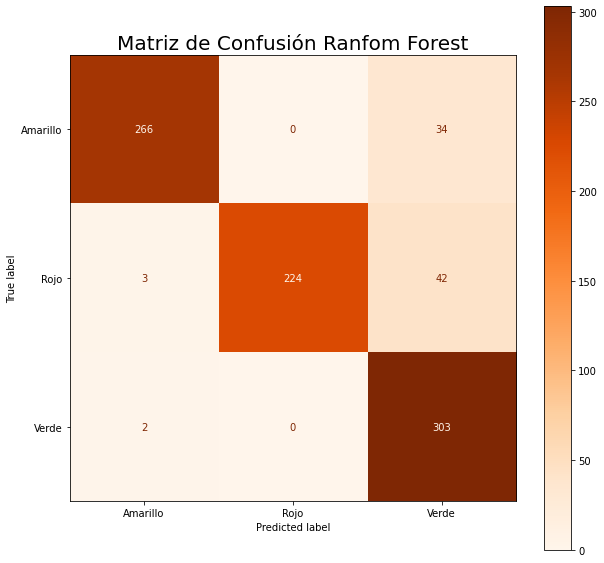

In [32]:
fig, axs = plt.subplots(figsize=(10,10))
ConfusionMatrixDisplay.from_predictions(y_test.argmax(axis=1), y_testRF.argmax(axis=1),
                                        display_labels=['Amarillo','Rojo','Verde'],
                                        cmap='Oranges', ax=axs
                                        )

axs.set_title('Matriz de Confusión Ranfom Forest', fontsize=20)
plt.show() 

Con la Matriz de confusión podemos confirmar lo observado en el reporte de clasificación y curvas de precision-recall: 

* Color **Verde (clase 2)**: es en donde mas se equivoca nuestro modelo. Por ejemplo, con Random Forest obtiene 303 verdaderos positivos, 42 los confunde con Rojo y 33 con Amarillo. Con Decision Tree es practicamente igual.

* El color **Rojo (clase 1)**: ambos modelos clasifican correctamente todas las instancias.

* Color **Amarillo (clase 0)** clasifica la mayoría de las veces correctamente con algunos erores.


_ _ _

_ _ _